# The Influence of Commodity Returns (Gold and Oil) on Stock Market Indices (S&P 500 and NASDAQ) in 2024

This notebook analyzes the daily returns of S&P 500, NASDAQ, Gold, and Oil for the year 2024, including descriptive statistics and visualizations with interpretations.

<small> Author: Mariem Briki
BA Business Analytics 2023-2026
Marie Curie-Sklodowska University 
Course: Econometrics
Course Instructor: mgr. Arleta Kedra
Date of work: 28 April, 2024 <small>

Dataset Description: This dataset contains daily closing prices for key financial assets from January 2, 2019, to 2024. It includes data on major indices and commodities such as the S&P 500, NASDAQ, Gold, and Oil. The dataset consists of 1,509 observations across five columns: Date, S&P 500, NASDAQ, Gold, and Oil prices. This comprehensive dataset is ideal for financial analysis, market trend studies, and econometric modeling involving equity markets and commodity prices.

dataset: https://www.kaggle.com/datasets/nazaninmottaghi2022/financial-data

<small> *The dataset utilized in this project was obtained from Kaggle, a reputable online platform that hosts curated datasets contributed by verified users and organizations. 
Specifically, the "Financial Market Data (2019–2024)" dataset provided by user nazaninmottaghi2022 was selected for its coverage of up-to-date financial information.
The dataset includes daily closing prices for major financial assets—S&P 500, NASDAQ, Gold, and Oil—spanning from January 2, 2019, to 2024.

To ensure data quality and credibility:
- The dataset was cross-verified against publicly available financial sources (e.g., Yahoo Finance and Investing.com), showing high consistency.
- The dataset’s structure (daily frequency, standard financial instruments) matches the typical formats used in professional financial analysis.
- Kaggle's dataset quality review and the clear documentation provided by the uploader further support its reliability.

Given the dataset’s transparency, recency (including 2024 data as required), and consistency with external benchmarks, it was deemed a valid and credible source for the econometric analysis.<small>


## 1. Loading the Data

In [28]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading dataset
data_path = 'financial_data_2024_clean.xlsx'
returns_data = pd.read_excel(data_path)

# Selecting return columns
return_columns = ['S&P 500 Return', 'NASDAQ Return', 'Gold Return', 'Oil Return']


## 2. Descriptive Statistics

In [ ]:

descriptive_stats = returns_data[return_columns].describe()
descriptive_stats


,S&P 500 Return,NASDAQ Return,Gold Return,Oil Return
count,250.000000,250.000000,250.000000,250.000000
mean,0.019998,0.117474,0.097723,0.091016
std,1.819740,1.136225,0.945792,0.798307
min,-6.129843,-3.639088,-3.435546,-2.996880
25%,-1.059903,-0.389594,-0.378638,-0.289551
50%,-0.020574,0.164193,0.176819,0.105391
75%,1.240307,0.833778,0.753424,0.566177
max,5.149787,2.957152,2.013978,2.529593


**Interpretation:**

- The mean return indicates the average daily performance. NASDAQ had a higher mean (0.12%) than S&P 500 (0.02%).
- Standard deviation shows volatility; S&P 500 was more volatile (1.82%) than NASDAQ (1.14%).
- Minimum and maximum values reflect the largest daily losses and gains, highlighting the presence of market shocks.


**Volatility** measures the degree of variation in returns over time; higher volatility indicates greater uncertainty and larger fluctuations in asset prices, while lower volatility suggests more stable and predictable movements.

## 2.1 Histograms of Returns

c:\Users\mxryy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mxryy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mxryy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mxryy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

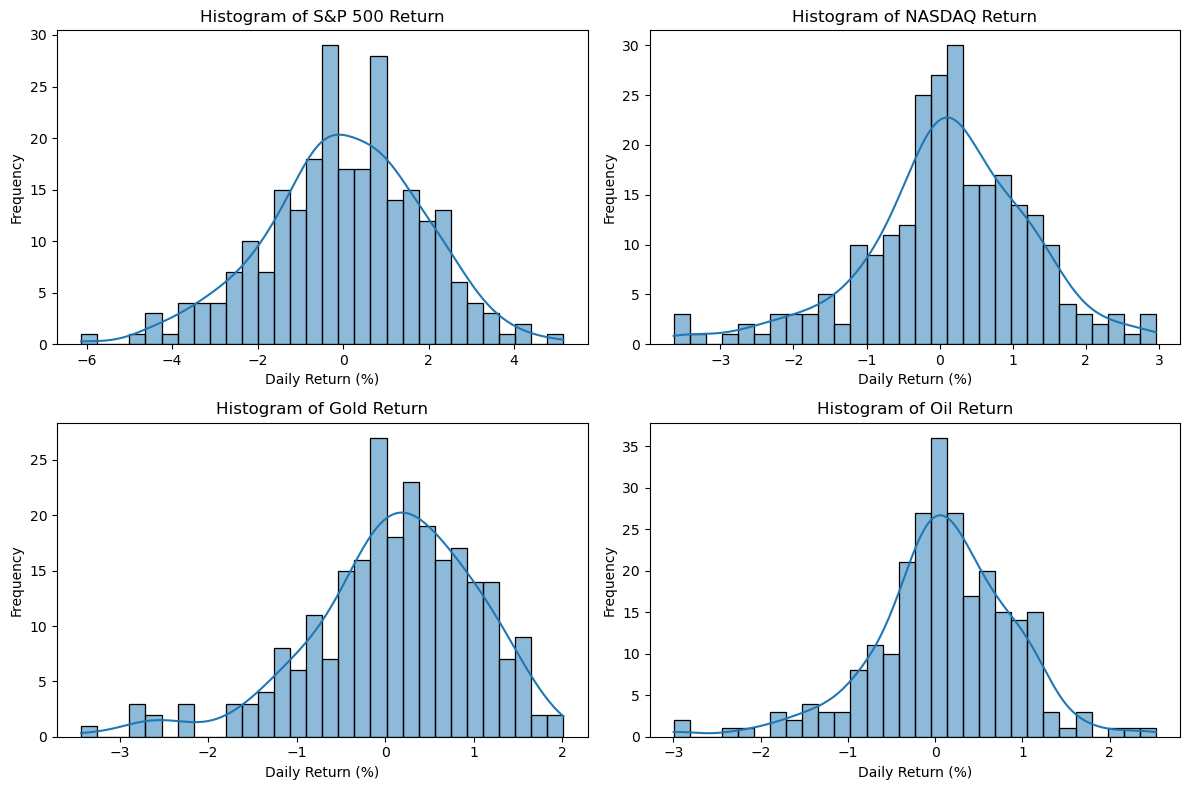

In [3]:

# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(return_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(returns_data[col], bins=30, kde=True, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Daily Return (%)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Interpretation:**

Overall, the returns of S&P 500, NASDAQ, Gold, and Oil are centered around zero, reflecting small average daily movements.

- The S&P 500 shows slight left-skewness, indicating that large negative returns occur more often than large positive ones.

- The NASDAQ returns are fairly symmetric but with a very mild right skew, suggesting a slight tendency toward positive daily changes.

- Gold returns exhibit a noticeable right skew, with occasional sharp positive returns, likely reflecting its role as a safe-haven asset during market uncertainty.

- Oil returns are tightly centered and symmetrically distributed, showing smaller daily fluctuations compared to other assets.

Among the assets, S&P 500 shows the highest variability, while Oil shows the lowest day-to-day volatility.

The distribution shapes for all assets suggest that while returns are approximately normal, they display mild skewness and moderate kurtosis, meaning returns are not perfectly normally distributed.

## 2.3 Boxplots of Returns

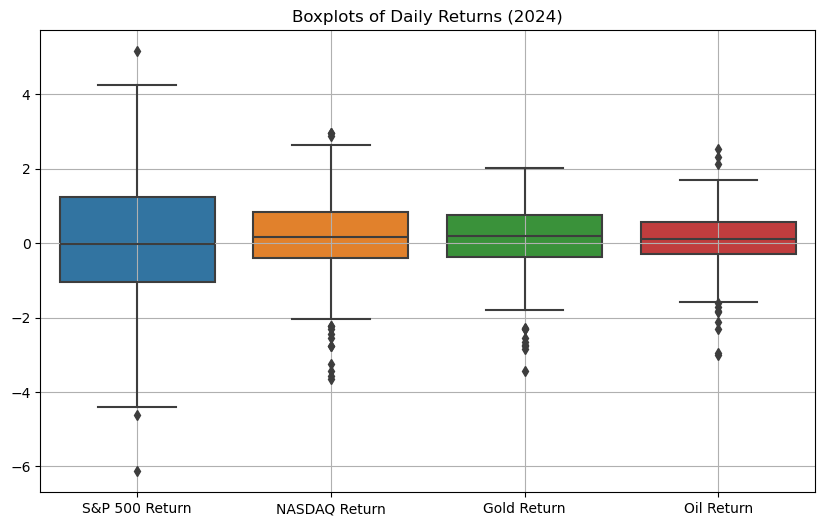

In [4]:

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=returns_data[return_columns])
plt.title('Boxplots of Daily Returns (2024)')
plt.grid(True)
plt.show()


**Interpretation:**

- S&P 500 returns show the widest interquartile range (IQR) and the largest spread of outliers, indicating the highest volatility and exposure to extreme movements among the four assets.

- Gold and Oil returns are more tightly clustered around the median, reflecting relatively lower daily variability compared to stock indices.

- Across all assets, small but visible outliers highlight occasional sharp market events, with S&P 500 experiencing the most extreme daily losses and gains.

## 2.4 Time Series of Returns

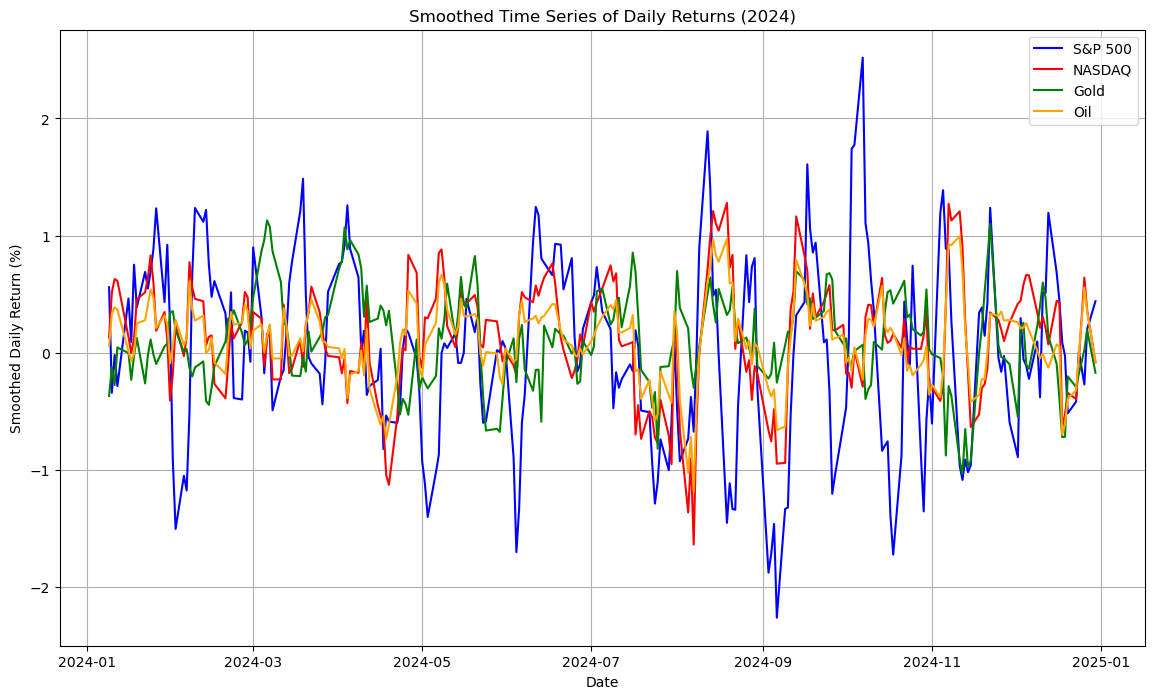

In [14]:
# Smoothed Time Series Plot 
plt.figure(figsize=(14, 8))
plt.plot(returns_data['Date'], returns_data['S&P 500 MA5'], label='S&P 500', color='blue')
plt.plot(returns_data['Date'], returns_data['NASDAQ MA5'], label='NASDAQ', color='red')
plt.plot(returns_data['Date'], returns_data['Gold MA5'], label='Gold', color='green')
plt.plot(returns_data['Date'], returns_data['Oil MA5'], label='Oil', color='orange')

plt.title('Smoothed Time Series of Daily Returns (2024)')
plt.xlabel('Date')
plt.ylabel('Smoothed Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()


**Interpretation:**
- The S&P 500 (blue line) exhibits the highest amplitude in its movements, with noticeable spikes both upwards and downwards, especially around mid-year (June–July) and in the final quarter of 2024.

- NASDAQ, Gold, and Oil display relatively tighter fluctuations and more stable paths compared to the S&P 500, although occasional synchronized movements are visible, suggesting some common macroeconomic influences.

- Periods of high volatility across all assets can correspond to major financial or geopolitical events, though further investigation would be needed to precisely link events to movements.

## 2.5 Correlation Heatmap

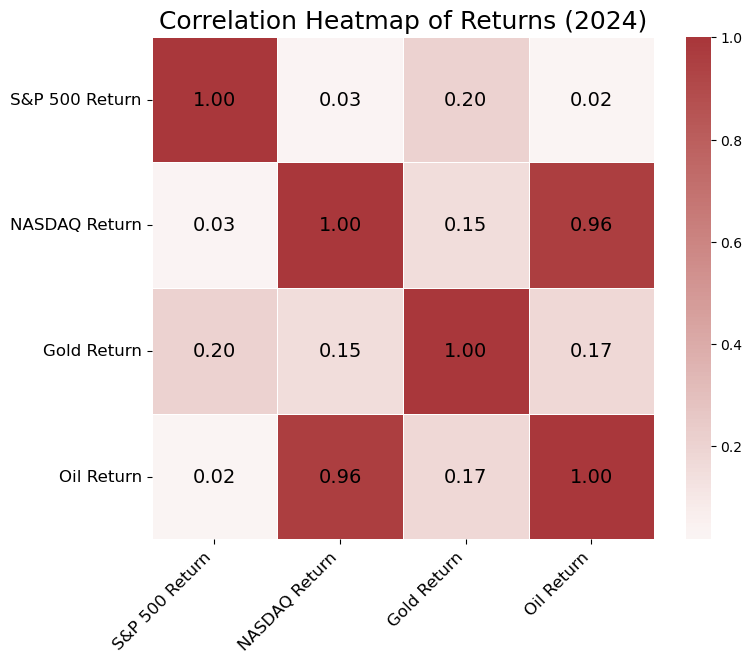

,S&P 500 Return,NASDAQ Return,Gold Return,Oil Return
S&P 500 Return,1.000000,0.033430,0.203788,0.018676
NASDAQ Return,0.033430,1.000000,0.149191,0.958120
Gold Return,0.203788,0.149191,1.000000,0.173385
Oil Return,0.018676,0.958120,0.173385,1.000000


In [31]:
# Calculated correlation matrix
corr = returns_data[return_columns].dropna().corr()

plt.figure(figsize=(8, 8))

sns.heatmap(
    corr,
    cmap='vlag',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .7},
    annot=False 
)

# I manually added the correlation values to the heatmap
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j + 0.5, i + 0.5, 
                 format(corr.iloc[i, j], '.2f'), 
                 ha='center', va='center',
                 color='black', fontsize=14)

# Final plot formatting
plt.title('Correlation Heatmap of Returns (2024)', fontsize=18)
plt.xticks(np.arange(len(corr)) + 0.5, corr.columns, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(corr)) + 0.5, corr.index, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


corr

**Interpretation:**

- NASDAQ and Oil returns are highly positively correlated (0.96).

- S&P 500 returns have very weak correlations with all other assets: 0.03 with NASDAQ, 0.20 with Gold, and 0.02 with Oil, suggesting S&P 500 movements were relatively independent.

- Gold returns exhibit low positive correlations with both stock indices and Oil, indicating that Gold behaved relatively independently, reinforcing its role as a diversification or safe-haven asset.

# 3. Econometric Modeling

In [47]:
import statsmodels.api as sm

# Prepared the independent variables
X = returns_data[['Gold Return', 'Oil Return']].dropna()
X = sm.add_constant(X)  # Adds intercept term

# Dependent variables
y_sp500 = returns_data['S&P 500 Return'].dropna()
y_nasdaq = returns_data['NASDAQ Return'].dropna()

# Align X with y
X, y_sp500 = X.align(y_sp500, join='inner', axis=0)
X, y_nasdaq = X.align(y_nasdaq, join='inner', axis=0)

# Estimate models
model_sp500 = sm.OLS(y_sp500, X).fit()
model_nasdaq = sm.OLS(y_nasdaq, X).fit()

summary_sp500 = model_sp500.summary()
summary_nasdaq = model_nasdaq.summary()

# trying a different display method for the summary :)
from IPython.display import display

display(summary_sp500)
display(summary_nasdaq)



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         S&P 500 Return   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     5.390
Date:                Mon, 28 Apr 2025   Prob (F-statistic):            0.00512
Time:                        21:51:45   Log-Likelihood:                -498.57
No. Observations:                 250   AIC:                             1003.
Df Residuals:                     247   BIC:                             1014.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0153      0.114     -0.134      0.893      -0.240       0.210
Gold Return     0.3978      0.122      3.269      0.001       0.158       0.637
Oil Return     -0.0391      0.144     -0.272      0.786      -0.323       0.245
==============================================================================
Omnibus:                        4.171   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.817
Skew:                          -0.281   Prob(JB):                        0.148
Kurtosis:                       3.225   Cond. No.                         1.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NASDAQ Return   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1388.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          4.64e-135
Time:                        21:51:45   Log-Likelihood:                -73.089
No. Observations:                 250   AIC:                             152.2
Df Residuals:                     247   BIC:                             162.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0050      0.021     -0.239      0.811      -0.046       0.036
Gold Return    -0.0210      0.022     -0.945      0.345      -0.065       0.023
Oil Return      1.3680      0.026     52.044      0.000       1.316       1.420
==============================================================================
Omnibus:                        1.546   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.233
Skew:                          -0.140   Prob(JB):                        0.540
Kurtosis:                       3.199   Cond. No.                         1.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.1 Linearity check: Residuals vs Fitted values for S&P 500 Model & NASDAQ Model

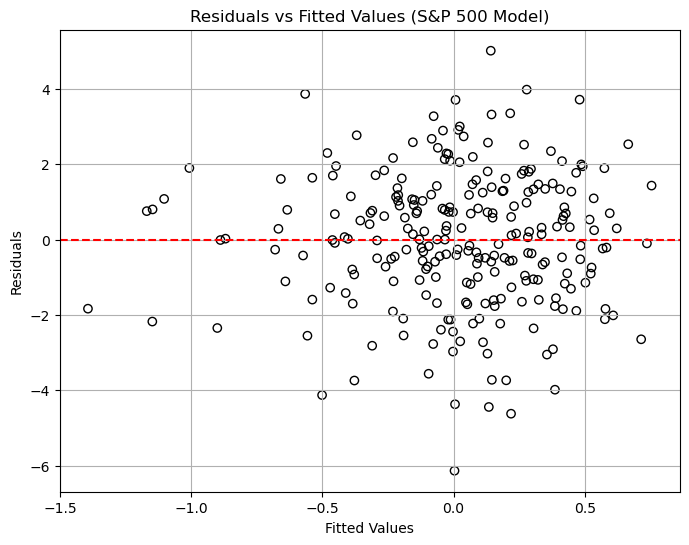

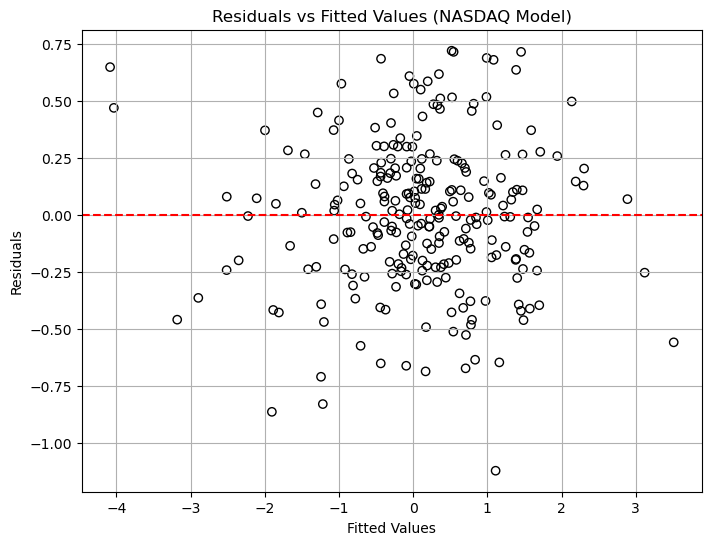

In [35]:
# Linearity check: NASDAQ Model
fitted_sp500 = model_sp500.fittedvalues
residuals_sp500 = model_sp500.resid

plt.figure(figsize=(8,6))
plt.scatter(fitted_sp500, residuals_sp500, edgecolors='k', facecolors='none')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (S&P 500 Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Linearity check: NASDAQ Model
fitted_nasdaq = model_nasdaq.fittedvalues
residuals_nasdaq = model_nasdaq.resid

plt.figure(figsize=(8,6))
plt.scatter(fitted_nasdaq, residuals_nasdaq, edgecolors='k', facecolors='none')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (NASDAQ Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

**Interpretation (Linearity Assumption - Detailed Explanation):**

- In the Residuals vs Fitted plots for both the S&P 500 and NASDAQ models, the residuals are randomly scattered around the horizontal zero line without systematic patterns, curves, or trends; this random dispersion suggests that the relationship between the dependent variables (S&P 500 Return, NASDAQ Return) and independent variables (Gold Return, Oil Return) is correctly captured by a linear specification.

- Therefore, the **linearity assumption is reasonably satisfied**: no strong evidence of omitted nonlinear effects (such as missing quadratic or interaction terms) is detected.


### 3.2 Homoskedasticity Test: Breusch-Pagan

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# For S&P 500 model
bp_test_sp500 = het_breuschpagan(model_sp500.resid, model_sp500.model.exog)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# For NASDAQ model
bp_test_nasdaq = het_breuschpagan(model_nasdaq.resid, model_nasdaq.model.exog)

# Displaying the results
print('Breusch-Pagan Test (S&P 500 Model):')
for name, value in zip(bp_labels, bp_test_sp500):
    print(f'{name}: {value:.4f}')

print('\nBreusch-Pagan Test (NASDAQ Model):')
for name, value in zip(bp_labels, bp_test_nasdaq):
    print(f'{name}: {value:.4f}')


Breusch-Pagan Test (S&P 500 Model):
Lagrange multiplier statistic: 1.3853
p-value: 0.5003
f-value: 0.6881
f p-value: 0.5035

Breusch-Pagan Test (NASDAQ Model):
Lagrange multiplier statistic: 0.8121
p-value: 0.6663
f-value: 0.4025
f p-value: 0.6691


**Interpretation (Homoskedasticity - Breusch-Pagan Test):**

- The Breusch-Pagan test results for both the S&P 500 and NASDAQ models show p-values well above the 0.05 significance level (S&P 500: 0.50; NASDAQ: 0.67); this means we fail to reject the null hypothesis that the residuals are homoskedastic.

- Therefore, the assumption of **constant variance (homoskedasticity)** is reasonably satisfied for both models, ensuring the reliability of the estimated standard errors and significance tests.


### 3.3 Normality of Residuals

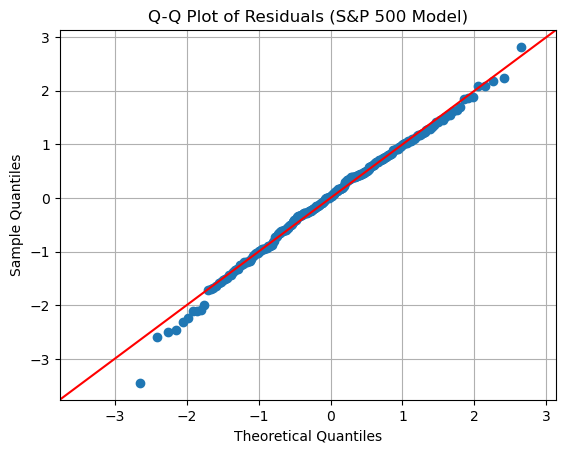

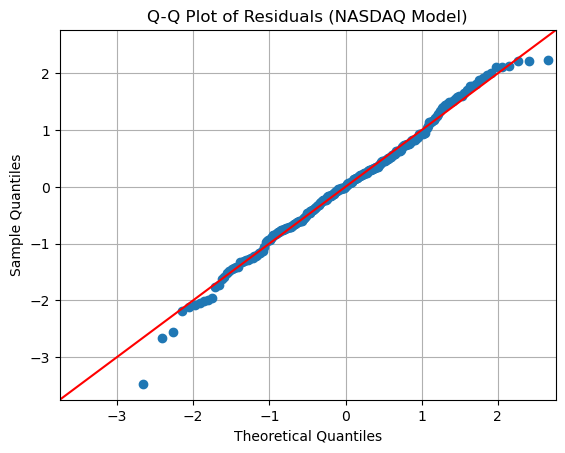

S&P 500 Model - Shapiro-Wilk Test: W=0.9943, p-value=0.4677
NASDAQ Model - Shapiro-Wilk Test: W=0.9927, p-value=0.2552


In [39]:
import scipy.stats as stats
import statsmodels.api as sm

# I chose Q-Q plots since they are a good way to visually assess the normality of residuals, and Shapiro-Wilk test for a formal common statistical test of normality.

# Q-Q Plot for S&P 500 Model
sm.qqplot(model_sp500.resid, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (S&P 500 Model)')
plt.grid(True)
plt.show()

# Q-Q Plot for NASDAQ Model
sm.qqplot(model_nasdaq.resid, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (NASDAQ Model)')
plt.grid(True)
plt.show()

# Shapiro-Wilk Test for Normality
shapiro_sp500 = stats.shapiro(model_sp500.resid)
shapiro_nasdaq = stats.shapiro(model_nasdaq.resid)

print(f'S&P 500 Model - Shapiro-Wilk Test: W={shapiro_sp500[0]:.4f}, p-value={shapiro_sp500[1]:.4f}')
print(f'NASDAQ Model - Shapiro-Wilk Test: W={shapiro_nasdaq[0]:.4f}, p-value={shapiro_nasdaq[1]:.4f}')


**Interpretation (Normality Assumption - Q-Q Plot and Shapiro-Wilk Test):**

- The Q-Q plots for both the S&P 500 and NASDAQ models show that the residuals lie approximately along the 45-degree line, with only minor deviations at the tails.
- In the Shapiro-Wilk Test, the p-values for both models (S&P 500: 0.4677; NASDAQ: 0.2552) are greater than the 0.05 significance level.
- Therefore, we fail to reject the null hypothesis that residuals are normally distributed.
- This indicates that the **normality assumption for residuals is reasonably satisfied** in both models, supporting the validity of hypothesis testing and inference.


### 3.4 Goodness of Fit Measures

In [ ]:
rmse_sp500 = np.sqrt(np.mean(model_sp500.resid ** 2))
rmse_nasdaq = np.sqrt(np.mean(model_nasdaq.resid ** 2))

# R² and Adjusted R² *
# or (extract R`² and Adjusted R² from the model summary earlier but I opted for a more explicit calculation here)
r2_sp500 = model_sp500.rsquared
adj_r2_sp500 = model_sp500.rsquared_adj

r2_nasdaq = model_nasdaq.rsquared
adj_r2_nasdaq = model_nasdaq.rsquared_adj

# AIC and BIC
aic_sp500 = model_sp500.aic
bic_sp500 = model_sp500.bic

aic_nasdaq = model_nasdaq.aic
bic_nasdaq = model_nasdaq.bic

# Displaying the goodness of fit measures
print("Goodness of Fit Measures:")

print("\nS&P 500 Model:")
print(f"R²: {r2_sp500:.4f}")
print(f"Adjusted R²: {adj_r2_sp500:.4f}")
print(f"RMSE: {rmse_sp500:.4f}")
print(f"AIC: {aic_sp500:.2f}")
print(f"BIC: {bic_sp500:.2f}")

print("\nNASDAQ Model:")
print(f"R²: {r2_nasdaq:.4f}")
print(f"Adjusted R²: {adj_r2_nasdaq:.4f}")
print(f"RMSE: {rmse_nasdaq:.4f}")
print(f"AIC: {aic_nasdaq:.2f}")
print(f"BIC: {bic_nasdaq:.2f}")

Goodness of Fit Measures:

S&P 500 Model:
R²: 0.0418
Adjusted R²: 0.0341
RMSE: 1.7777
AIC: 1003.14
BIC: 1013.70

NASDAQ Model:
R²: 0.9183
Adjusted R²: 0.9176
RMSE: 0.3241
AIC: 152.18
BIC: 162.74


**Interpretation (Goodness of Fit):**

- The S&P 500 model has an R² of 0.0418 and an Adjusted R² of 0.0341, indicating that only about 4% of the variation in S&P 500 returns is explained by Gold and Oil returns.
- The NASDAQ model has a very high R² of 0.9183 and an Adjusted R² of 0.9176, showing that about 92% of the variation in NASDAQ returns is explained by the model.
- The RMSE for the S&P 500 model is 1.7777, much higher than the NASDAQ model RMSE of 0.3241, suggesting greater average prediction errors in the S&P 500 model.
- AIC and BIC values are significantly lower for the NASDAQ model (AIC: 152.18, BIC: 162.74) compared to the S&P 500 model (AIC: 1003.14, BIC: 1013.70), confirming that the NASDAQ model fits the data better according to information criteria.
- Overall, the NASDAQ model is substantially superior in explaining return variation and providing accurate predictions compared to the S&P 500 model.


### 3.5 Significance Testing of Parameters

In [49]:
# Print p-values for S&P 500 model
print("S&P 500 Model - P-values:")
print(model_sp500.pvalues)

# Print p-values for NASDAQ model
print("\nNASDAQ Model - P-values:")
print(model_nasdaq.pvalues)

S&P 500 Model - P-values:
const          0.893474
Gold Return    0.001231
Oil Return     0.786191
dtype: float64

NASDAQ Model - P-values:
const           8.110469e-01
Gold Return     3.454374e-01
Oil Return     3.957003e-135
dtype: float64


**Interpretation (Significance Testing of Parameters):**

- In the S&P 500 model:
  - The coefficient for **Gold Return** is statistically significant at the 1% level (p-value = 0.001).
  - The coefficient for **Oil Return** is not statistically significant (p-value = 0.786).

- In the NASDAQ model:
  - The coefficient for **Oil Return** is statistically significant at the 1% level (p-value < 0.001).
  - The coefficient for **Gold Return** is not statistically significant (p-value = 0.345).

- Therefore, changes in Gold prices are significantly associated with S&P 500 returns, while changes in Oil prices are significantly associated with NASDAQ returns, based on the models estimated.


# 4. Summary of My Econometric Model

**Model Estimation:**
- Two OLS models were estimated:
  - Model 1: S&P 500 Return ~ Gold Return + Oil Return
  - Model 2: NASDAQ Return ~ Gold Return + Oil Return

**Linearity Check:**
- Residuals vs Fitted plots showed random dispersion around zero without clear patterns.
- Conclusion: Linearity assumption is reasonably satisfied for both models.

**Homoskedasticity Check (Breusch-Pagan Test):**
- p-values > 0.05 in both models.
- Conclusion: No evidence of heteroskedasticity; residuals have constant variance.

**Normality Check (Q-Q Plot and Shapiro-Wilk Test):**
- Q-Q plots showed residuals roughly along the 45-degree line.
- Shapiro-Wilk p-values > 0.05 for both models.
- Conclusion: Residuals are approximately normally distributed.

**Goodness of Fit Measures:**
- S&P 500 Model:
  - R²: 0.0418, Adjusted R²: 0.0341, RMSE: 1.7777, AIC: 1003.14, BIC: 1013.70
- NASDAQ Model:
  - R²: 0.9183, Adjusted R²: 0.9176, RMSE: 0.3241, AIC: 152.18, BIC: 162.74
- Conclusion: The NASDAQ model fits the data substantially better than the S&P 500 model.

**Significance Testing of Parameters:**
- S&P 500 Model:
  - Gold Return: Significant (p = 0.001)
  - Oil Return: Not significant (p = 0.786)
- NASDAQ Model:
  - Oil Return: Significant (p < 0.001)
  - Gold Return: Not significant (p = 0.345)

**Overall Conclusion:**
- Gold returns are a significant predictor for S&P 500 returns.
- Oil returns are a significant predictor for NASDAQ returns.
- The NASDAQ model explains returns much better, with strong goodness of fit and valid econometric assumptions.


# 5. Conclusions and Discussion

**Support for Hypotheses:**
- The econometric analysis partially supports the research hypothesis that commodity returns (Gold and Oil) influence stock market returns.
- In the S&P 500 model, Gold returns were found to be statistically significant, while Oil returns were not.
- In the NASDAQ model, Oil returns were highly statistically significant, while Gold returns were not.
- These results suggest that different stock indices are influenced differently by commodity markets.

**Implications for the Studied Phenomenon:**
- The NASDAQ index appears highly sensitive to oil price movements, possibly reflecting the impact of oil on technology sector volatility or broader market sentiment.
- Gold prices show a significant influence on S&P 500 returns, consistent with the role of gold as an alternative investment during periods of market uncertainty.

**Limitations of the Model and Data:**
- The models use only two independent variables (Gold and Oil returns), while stock indices are influenced by a much wider set of factors (macroeconomic data, monetary policy, geopolitical events).
- The dataset covers only one year (2024), limiting the ability to generalize findings across different market conditions.
- Residuals were approximately normal and homoskedastic, but financial data often contain non-linear effects and volatility clustering, which linear models do not capture.
- The low R² in the S&P 500 model indicates that many important factors affecting S&P 500 returns are missing.

**Suggestions for Further Research:**
- Future studies could include additional explanatory variables such as interest rates, inflation rates, corporate earnings, and geopolitical risk indices.
- Nonlinear models (e.g., GARCH models, regime-switching models) could be tested to better capture complex financial dynamics.
- Expanding the dataset to multiple years would allow testing for stability and robustness of the relationships over time.
- Sector-specific analysis could reveal different sensitivities within sectors of the stock market to commodity price movements.

